# Netflix Data Analysis (Based on View Activity)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

In [18]:
df_activity = pd.read_csv('netflix-report/CONTENT_INTERACTION/ViewingActivity.csv')

In [19]:
df_activity.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Harzzz,2022-07-25 08:22:45,00:15:13,NaN,The Gray Man,NaN,Android DefaultWidevineL3Phone Android Phone,00:27:51,00:27:51,IN (India)
1,Harzzz,2022-07-23 17:29:40,00:26:32,NaN,Formula 1: Drive to Survive: Season 2: Seeing ...,NaN,Chrome PC (Cadmium),00:26:37,00:26:37,IN (India)
2,Harzzz,2022-07-23 16:34:30,00:21:12,NaN,Formula 1: Drive to Survive: Season 2: Raging ...,NaN,Chrome PC (Cadmium),00:36:01,00:36:01,IN (India)
3,Harzzz,2022-07-23 16:33:37,00:00:06,Autoplayed: user action: None;,Coming Soon: Evergreen: Formula 1: Drive to Su...,TEASER_TRAILER,Chrome PC (Cadmium),00:00:06,00:00:06,IN (India)
4,Harzzz,2022-07-23 16:33:30,00:00:01,NaN,Formula 1: Drive to Survive: Season 2: Boiling...,NaN,Chrome PC (Cadmium),00:38:38,00:38:38,IN (India)


## Data Cleaning

In [20]:
df_my_activity = df_activity[df_activity['Profile Name'] == 'Kimzzz']

In [21]:
df_my_activity.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
4390,Kimzzz,2022-07-25 12:39:25,00:02:00,NaN,Riverdale: Season 6: Chapter One Hundred and S...,NaN,Android DefaultWidevineL3Phone Android Phone,00:01:59,00:01:59,IN (India)
4391,Kimzzz,2022-07-25 12:39:15,00:00:01,NaN,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,Android DefaultWidevineL3Phone Android Phone,00:12:03,00:12:03,IN (India)
4392,Kimzzz,2022-07-25 09:24:49,00:08:24,NaN,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,Android DefaultWidevineL3Phone Android Phone,00:12:06,Not latest view,IN (India)
4393,Kimzzz,2022-07-25 09:21:05,00:03:35,NaN,Gotham: Season 1: Red Hood (Episode 17),NaN,Android DefaultWidevineL3Phone Android Phone,00:42:43,00:42:43,IN (India)
4394,Kimzzz,2022-07-25 08:59:37,00:12:52,NaN,Gotham: Season 1: Red Hood (Episode 17),NaN,Android DefaultWidevineL3Phone Android Phone,00:30:04,Not latest view,IN (India)


In [22]:
df_my_activity = df_my_activity.drop(['Attributes', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [23]:
df_my_activity = df_my_activity.reset_index().drop(['index'], axis = 1)

In [24]:
df_my_activity['Supplemental Video Type'].value_counts()

HOOK              491
TRAILER           268
PROMOTIONAL       134
TEASER_TRAILER     48
PREVIEW            19
RECAP               7
BUMPER              3
TUTORIAL            1
Name: Supplemental Video Type, dtype: int64

In [25]:
df_my_activity = df_my_activity[df_my_activity['Supplemental Video Type'].isna()]

In [26]:
df_my_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2984
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             2014 non-null   object
 1   Start Time               2014 non-null   object
 2   Duration                 2014 non-null   object
 3   Title                    2014 non-null   object
 4   Supplemental Video Type  0 non-null      object
dtypes: object(5)
memory usage: 94.4+ KB


In [27]:
df_my_activity['Duration_Seconds'] = df_my_activity['Duration'].str.split(':').apply(lambda x: int(x[0])*3600 + int(x[1])*60 + int(x[2]))

In [28]:
df_my_activity = df_my_activity.rename(columns = {'Start Time':'Date'})

In [29]:
df_my_activity['Date'] = pd.to_datetime(df_my_activity['Date'])
df_my_activity['Duration'] = pd.to_timedelta(df_my_activity['Duration'])

In [30]:
df_my_activity.dtypes

Profile Name                        object
Date                        datetime64[ns]
Duration                   timedelta64[ns]
Title                               object
Supplemental Video Type             object
Duration_Seconds                     int64
dtype: object

In [31]:
df_my_activity['Year'], df_my_activity['Month'] = df_my_activity['Date'].dt.year, df_my_activity['Date'].dt.month_name()
df_my_activity['Day'] = df_my_activity['Date'].dt.day
df_my_activity['Day_of_week'] = df_my_activity['Date'].dt.day_name()

In [32]:
df_my_activity.head()

,Profile Name,Date,Duration,Title,Supplemental Video Type,Duration_Seconds,Year,Month,Day,Day_of_week
0,Kimzzz,2022-07-25 12:39:25,0 days 00:02:00,Riverdale: Season 6: Chapter One Hundred and S...,NaN,120,2022,July,25,Monday
1,Kimzzz,2022-07-25 12:39:15,0 days 00:00:01,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,1,2022,July,25,Monday
2,Kimzzz,2022-07-25 09:24:49,0 days 00:08:24,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,504,2022,July,25,Monday
3,Kimzzz,2022-07-25 09:21:05,0 days 00:03:35,Gotham: Season 1: Red Hood (Episode 17),NaN,215,2022,July,25,Monday
4,Kimzzz,2022-07-25 08:59:37,0 days 00:12:52,Gotham: Season 1: Red Hood (Episode 17),NaN,772,2022,July,25,Monday


In [33]:
show_details = df_my_activity['Title'].str.split(":", expand=True, n=2)
#show_details
df_my_activity['Show_name'] = show_details[0]
df_my_activity['Season'] = show_details[1]
df_my_activity['Episode_name'] = show_details[2]

In [34]:
df_my_activity.head()

,Profile Name,Date,Duration,Title,Supplemental Video Type,Duration_Seconds,Year,Month,Day,Day_of_week,Show_name,Season,Episode_name
0,Kimzzz,2022-07-25 12:39:25,0 days 00:02:00,Riverdale: Season 6: Chapter One Hundred and S...,NaN,120,2022,July,25,Monday,Riverdale,Season 6,Chapter One Hundred and Sixteen: The Stand (E...
1,Kimzzz,2022-07-25 12:39:15,0 days 00:00:01,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,1,2022,July,25,Monday,Gotham,Season 1,Everyone Has a Cobblepot (Episode 18)
2,Kimzzz,2022-07-25 09:24:49,0 days 00:08:24,Gotham: Season 1: Everyone Has a Cobblepot (Ep...,NaN,504,2022,July,25,Monday,Gotham,Season 1,Everyone Has a Cobblepot (Episode 18)
3,Kimzzz,2022-07-25 09:21:05,0 days 00:03:35,Gotham: Season 1: Red Hood (Episode 17),NaN,215,2022,July,25,Monday,Gotham,Season 1,Red Hood (Episode 17)
4,Kimzzz,2022-07-25 08:59:37,0 days 00:12:52,Gotham: Season 1: Red Hood (Episode 17),NaN,772,2022,July,25,Monday,Gotham,Season 1,Red Hood (Episode 17)


In [35]:
df_my_activity['Show_type'] = df_my_activity.apply(lambda x:'Movie' if pd.isnull(x['Season']) else 'TV Show' , axis=1)

In [36]:
df_my_activity.head(1)

,Profile Name,Date,Duration,Title,Supplemental Video Type,Duration_Seconds,Year,Month,Day,Day_of_week,Show_name,Season,Episode_name,Show_type
0,Kimzzz,2022-07-25 12:39:25,0 days 00:02:00,Riverdale: Season 6: Chapter One Hundred and S...,NaN,120,2022,July,25,Monday,Riverdale,Season 6,Chapter One Hundred and Sixteen: The Stand (E...,TV Show


## Analysis based on Frequency

In [50]:
figsize_tuple = (10, 5)
font = {'family': 'serif',
        'color': '#004466',
        'weight': 'normal',
        'size': 15}

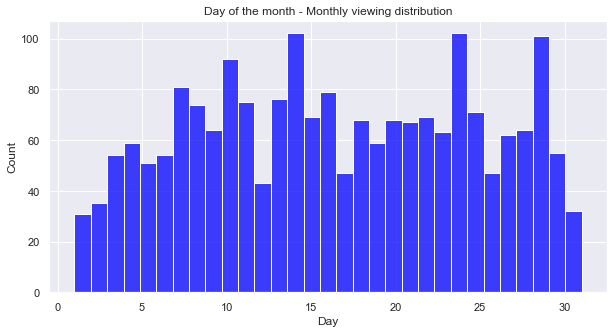

In [45]:
plt.figure(figsize = figsize_tuple)
plt.title("Day of the month - Monthly viewing distribution")
ax = sns.histplot(df_my_activity['Day'],
                  bins=31,
                  color="blue")
plt.show()

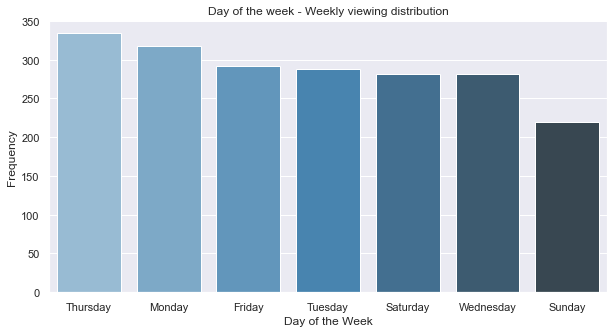

In [46]:
plt.figure(figsize = figsize_tuple)
ax = sns.barplot(x = df_my_activity["Day_of_week"].value_counts().index, 
                 y = df_my_activity["Day_of_week"].value_counts(), 
                 palette="Blues_d")
plt.title("Day of the week - Weekly viewing distribution")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.show()

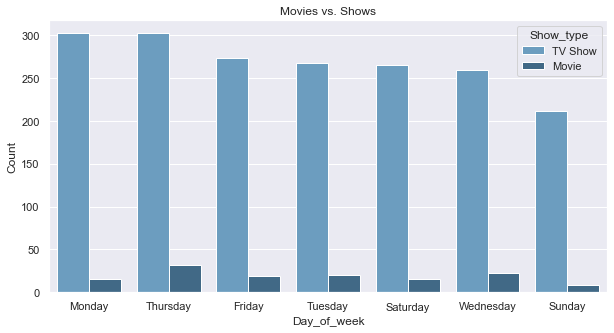

In [47]:
show_freq = df_my_activity.groupby('Show_type')['Day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
#show_freq
plt.figure(figsize = figsize_tuple)
ax = sns.barplot(x = show_freq["Day_of_week"], 
                 y = show_freq["Count"], 
                 hue=show_freq["Show_type"], 
                 palette="Blues_d")
plt.title("Movies vs. Shows")
plt.show()

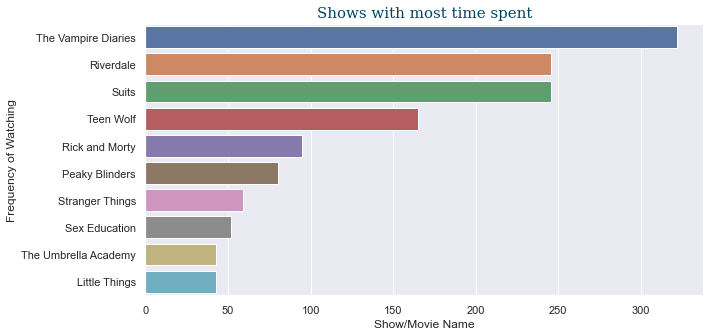

In [84]:
plt.figure(figsize = figsize_tuple)
ax = sns.barplot(y = df_my_activity['Show_name'].sort_values(ascending=True).value_counts().index[:10], 
                 x = df_my_activity['Show_name'].sort_values(ascending=True).value_counts()[:10])
plt.title("Shows with most time spent", fontdict=font)
plt.xlabel("Show/Movie Name")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
plt.show()

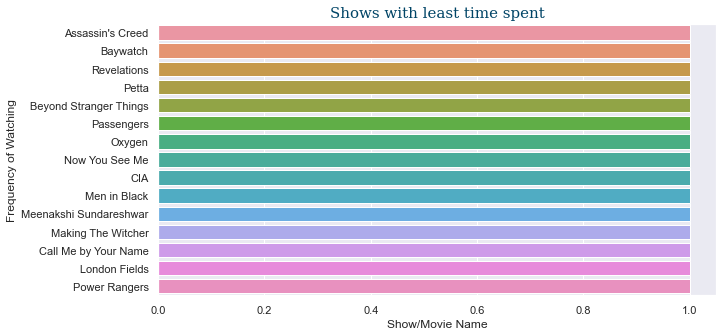

In [83]:
plt.figure(figsize = figsize_tuple)
ax = sns.barplot(y = df_my_activity['Show_name'].sort_values(ascending=True).value_counts().index[-15:], 
                 x = df_my_activity['Show_name'].sort_values(ascending=True).value_counts()[-15:])
plt.title("Shows with least time spent", fontdict=font)
plt.xlabel("Show/Movie Name")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
plt.show()

## Analysis based on Duration

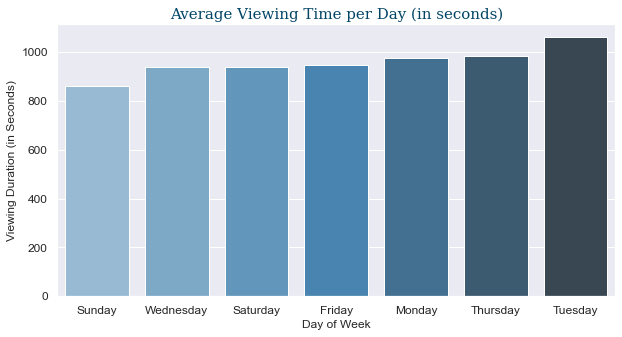

In [52]:
avg_seconds_per_day = df_my_activity.groupby('Day_of_week')['Duration_Seconds'].mean().sort_values()

sns.set_style("darkgrid")

plt.figure(figsize = figsize_tuple)
ax = sns.barplot(x = avg_seconds_per_day.index, 
                 y = avg_seconds_per_day.values, 
                 palette=("Blues_d"))
ax.set_ylabel('Viewing Duration (in Seconds)')
ax.set_xlabel('Day of Week')
ax.set_title('Average Viewing Time per Day (in seconds)', fontdict=font)

Text(0.5, 1.0, 'Top 10 Movie/Show by Average Duration (seconds)')

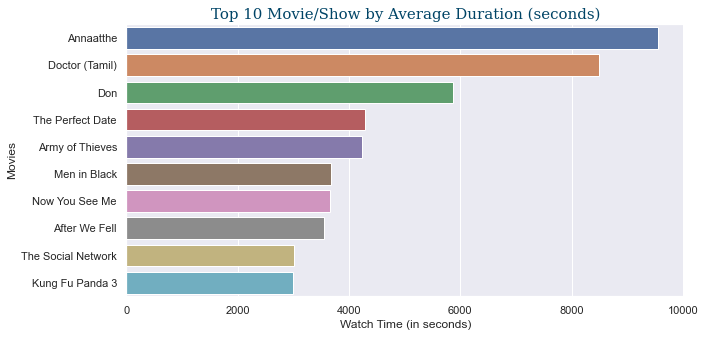

In [55]:
most_watched_tv_series = df_my_activity.groupby('Show_name')['Duration_Seconds'].mean().reset_index().sort_values(by = 'Duration_Seconds', ascending = False)  
plt.figure(figsize = figsize_tuple) 
ax = sns.barplot(y = most_watched_tv_series['Show_name'][:10], x = most_watched_tv_series['Duration_Seconds'][:10]) 
ax.set_ylabel('Movies') 
ax.set_xlabel('Watch Time (in seconds)') 
ax.set_title('Top 10 Movie/Show by Average Duration (seconds)', fontdict=font) 

In [65]:
binge_series = df_my_activity.groupby(['Show_name'])['Episode_name'].count().reset_index().sort_values(by='Episode_name', ascending=False)
binge_series

,Show_name,Episode_name
121,The Vampire Diaries,322
95,Suits,246
86,Riverdale,246
98,Teen Wolf,165
85,Rick and Morty,95
...,...,...
66,Making The Witcher,0
19,Call Me by Your Name,0
63,Love and Monsters,0
62,London Fields,0


In [66]:
binge_series = binge_series[binge_series['Episode_name'] > 5]
binge_series

,Show_name,Episode_name
121,The Vampire Diaries,322
95,Suits,246
86,Riverdale,246
98,Teen Wolf,165
85,Rick and Morty,95
79,Peaky Blinders,80
94,Stranger Things,59
88,Sex Education,52
61,Little Things,43
120,The Umbrella Academy,43


Text(0.5, 1.0, 'Top 10 Binge Watching TV Series')

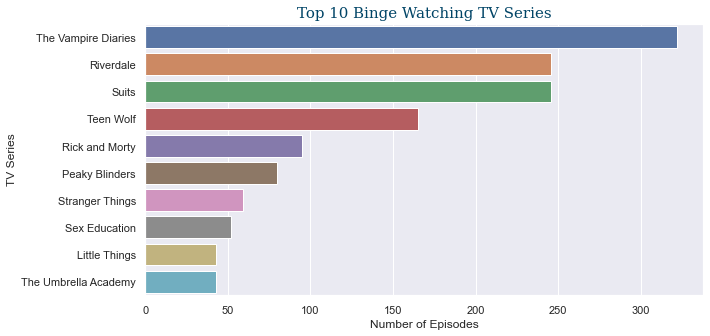

In [68]:
plt.figure(figsize = figsize_tuple)
ax = sns.barplot(y = top_10_binge['Show_name'][:10], x = top_10_binge['Episode_name'][:10])
ax.set_ylabel('TV Series')
ax.set_xlabel('Number of Episodes')
ax.set_title('Top 10 Binge Watching TV Series', fontdict=font)

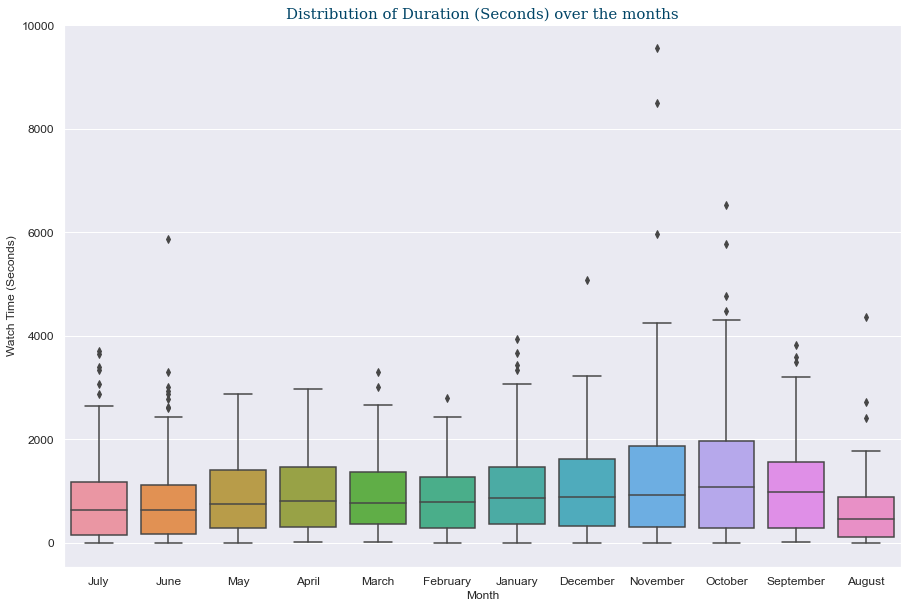

In [75]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x = df_my_activity['Month'], y = df_my_activity['Duration_Seconds'])
ax.set_ylabel('Watch Time (Seconds)')
ax.set_xlabel('Month')
ax.set_title('Distribution of Duration (Seconds) over the months', fontdict=font)
ax.tick_params(axis = 'both', labelsize= 12)

Text(0.5, 1.0, 'Distribution of Duration (Seconds) over the day of week')

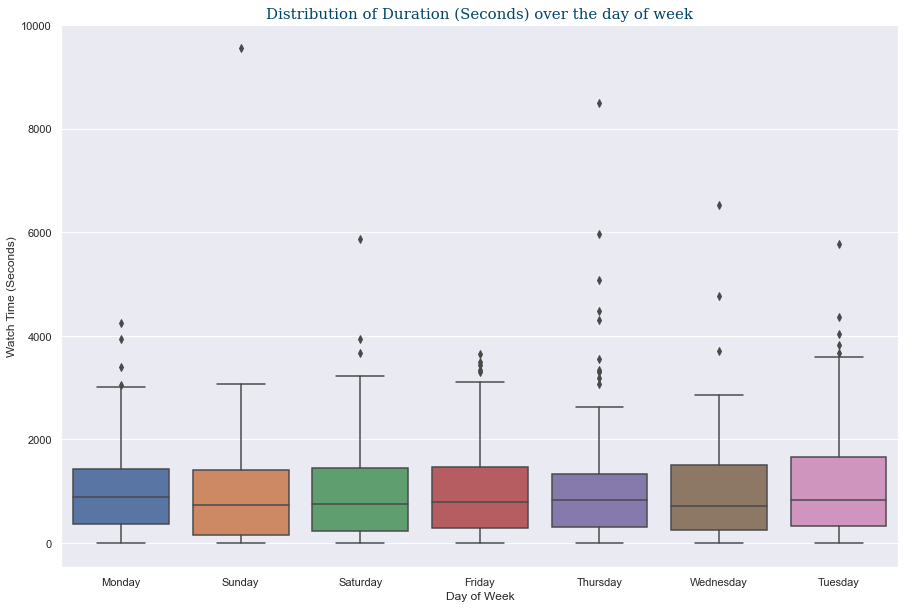

In [81]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x = df_my_activity['Day_of_week'], y = df_my_activity['Duration_Seconds'])
ax.set_ylabel('Watch Time (Seconds)')
ax.set_xlabel('Day of Week')
ax.set_title('Distribution of Duration (Seconds) over the day of week', fontdict=font)